In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import proplot as pplt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

from gcgnn.model_data import load_networkx_data
from gcgnn.plot import adjust_saturation, hex_to_rgba, adjacent_values

import matplotlib.pyplot as plt

COLORS = []
colors = pplt.Cycle("ggplot")
for color in colors:
    COLORS.append(color["color"])
colors = pplt.Cycle("default")
for color in colors:
    COLORS.append(color["color"])

pplt.rc["figure.facecolor"] = "white"

DATA_DIR="/scratch/gpfs/sj0161/delta_pattern/"
PLOT_DIR="/home/sj0161/gcgnn/fig/"
TRAIN_RESULT_DIR = "/scratch/gpfs/sj0161/gcgnn/history/"
RESULT_DIR = "/scratch/gpfs/sj0161/gcgnn/result/"

topo_unique = ["linear", "cyclic", "star", "comb", "branch", "dendrimer"]

y_types    = ["mean", "std"]
split_types= [0, 1, 2]
patterns   = [0, 1]

### Transferability across molecular weights (mean rg2)

In [36]:
from gcgnn.analysis import metric_csv

In [40]:
#MW_hi
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='mean', split_type=0, pattern=0, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_0_0_64_0.0005_1000_128_mean_mse_1
GNN_0_0_64_0.001_1000_256_mean_mse_1
GC_0_0_64_0.005_1000_32_mean_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,3.760121,2.309126,0.937031,0.969515,0.129344
1,GNN,Test,13.106415,7.599332,0.234942,0.906640,0.359789
2,GC,Test,14.682506,7.233357,0.039877,0.371683,0.322795
3,GC-GNN,Val,1.005937,0.538370,0.966197,0.983061,0.053191
4,GNN,Val,2.706696,1.400803,0.755266,0.873380,0.141157
5,GC,Val,4.466886,2.299125,0.333461,0.595213,0.229281


In [41]:
#MW_low
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='mean', split_type=1, pattern=0, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_1_0_256_0.005_1000_32_mean_mse_1
GNN_1_0_64_0.0005_1000_256_mean_mse_1
GC_1_0_512_0.0005_1000_128_mean_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,1.186592,0.859926,0.794183,0.928005,0.145457
1,GNN,Test,6.516124,2.930646,-5.206652,0.568905,0.470331
2,GC,Test,2.807308,2.476739,-0.152017,0.632371,0.452966
3,GC-GNN,Val,2.523039,1.260497,0.950991,0.975633,0.075157
4,GNN,Val,5.700627,2.582503,0.749806,0.866839,0.152179
5,GC,Val,10.275981,4.777101,0.187025,0.461979,0.282811


In [42]:
#MW_mid
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='mean', split_type=2, pattern=0, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_2_0_128_0.001_1000_128_mean_mse_1
GNN_2_0_256_0.001_1000_128_mean_mse_1
GC_2_0_512_0.0005_1000_32_mean_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,2.577873,1.240609,0.836788,0.921947,0.115346
1,GNN,Test,5.206021,2.469029,0.334359,0.793838,0.224745
2,GC,Test,5.629515,3.203642,0.221659,0.480798,0.268833
3,GC-GNN,Val,2.568977,1.124450,0.956335,0.977936,0.070435
4,GNN,Val,6.246265,2.518296,0.741861,0.864585,0.185677
5,GC,Val,10.368102,4.548057,0.288767,0.561977,0.300801


### Transferability across chemical patterns (mean rg2)

In [43]:
# train on all homopolymers and test on all copolymers
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='mean', split_type=0, pattern=1, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_0_1_256_0.0005_1000_256_mean_mse_1
GNN_0_1_64_0.0005_1000_256_mean_mse_1
GC_0_1_512_0.0005_1000_32_mean_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,5.353236,3.028813,0.633786,0.848762,0.231466
1,GNN,Test,5.964257,2.988814,0.545415,0.746007,0.279526
2,GC,Test,12.200127,7.488245,-0.902091,0.580928,0.652030
3,GC-GNN,Val,0.785519,0.442873,0.998725,0.999373,0.032219
4,GNN,Val,13.066452,5.974666,0.647176,0.824399,0.261641
5,GC,Val,17.074485,11.887363,0.397526,0.646428,0.883674


In [44]:
# train on low mid homopolymers and test on all other polymers
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='mean', split_type=0, pattern=2, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_0_2_512_0.005_1000_128_mean_mse_1
GNN_0_2_512_0.005_1000_128_mean_mse_1
GC_0_2_256_0.0005_1000_32_mean_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,6.187554,3.691740,0.662453,0.864415,0.297459
1,GNN,Test,9.518484,4.427995,0.201211,0.732293,0.273391
2,GC,Test,14.281703,8.750852,-0.798277,0.553209,0.737879
3,GC-GNN,Val,0.324620,0.207259,0.999104,0.999559,0.022501
4,GNN,Val,6.262558,3.461112,0.666709,0.828469,0.236290
5,GC,Val,8.222900,6.281746,0.425395,0.668840,0.699685


In [45]:
# train on mid high homopolymers and test on all other polymers
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='mean', split_type=1, pattern=2, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_1_2_64_0.001_1000_256_mean_mse_1
GNN_1_2_64_0.005_1000_128_mean_mse_1
GC_1_2_256_0.0005_1000_32_mean_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,9.151919,5.076094,-0.086701,0.766093,0.404451
1,GNN,Test,7.392362,3.935864,0.290990,0.548065,0.381615
2,GC,Test,11.245393,6.934507,-0.640722,0.584253,0.609126
3,GC-GNN,Val,0.970702,0.614202,0.998623,0.999318,0.038741
4,GNN,Val,13.949751,8.051150,0.715532,0.846693,0.276392
5,GC,Val,21.073442,16.217527,0.350810,0.620548,1.042044


In [46]:
# train on low high homopolymers and test on all other polymers
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='mean', split_type=2, pattern=2, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_2_2_512_0.005_1000_32_mean_mse_1
GNN_2_2_64_0.001_1000_128_mean_mse_1
GC_2_2_512_0.001_1000_32_mean_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,5.660823,3.248015,0.603668,0.831100,0.259330
1,GNN,Test,7.638737,4.611897,0.278323,0.669754,0.458972
2,GC,Test,11.910841,7.395540,-0.754626,0.570348,0.643976
3,GC-GNN,Val,0.886529,0.494205,0.998873,0.999451,0.032246
4,GNN,Val,15.546123,8.060553,0.653546,0.811378,0.408998
5,GC,Val,19.590657,13.316185,0.449826,0.688877,0.884462


### Transferability across molecular weights (std rg2)

In [47]:
#MW_hi
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='std', split_type=0, pattern=0, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_0_0_256_0.001_1000_64_std_mse_1
GNN_0_0_256_0.005_1000_256_std_mse_1
GC_0_0_256_0.005_1000_128_std_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,3.104854,1.374605,0.822829,0.920660,0.301637
1,GNN,Test,6.255534,2.295909,0.280816,0.812984,0.305692
2,GC,Test,6.847314,3.659701,0.138309,0.375897,1.759455
3,GC-GNN,Val,0.815974,0.359379,0.907189,0.952868,0.128202
4,GNN,Val,1.517876,0.682190,0.678842,0.826918,0.241979
5,GC,Val,2.212008,1.116080,0.317944,0.590017,0.652955


In [48]:
#MW_low
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='std', split_type=1, pattern=0, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_1_0_64_0.005_1000_64_std_mse_1
GNN_1_0_256_0.001_1000_32_std_mse_1
GC_1_0_128_0.001_1000_64_std_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,0.679601,0.380924,0.777549,0.902995,0.240484
1,GNN,Test,3.782380,1.516456,-5.890592,0.711717,0.797631
2,GC,Test,1.241994,0.750229,0.257041,0.725278,0.462722
3,GC-GNN,Val,2.045704,0.824277,0.854102,0.926522,0.199869
4,GNN,Val,3.268866,1.231740,0.627473,0.795239,0.272306
5,GC,Val,5.039091,2.185136,0.114747,0.407728,0.914467


In [49]:
#MW_mid
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='std', split_type=2, pattern=0, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_2_0_64_0.001_1000_64_std_mse_1
GNN_2_0_512_0.005_1000_256_std_mse_1
GC_2_0_512_0.0005_1000_256_std_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,1.469379,0.615452,0.806644,0.915741,0.204433
1,GNN,Test,2.285423,1.017065,0.532239,0.765180,0.329673
2,GC,Test,3.045129,1.512187,0.169570,0.533454,0.739480
3,GC-GNN,Val,2.084441,0.694537,0.856156,0.926689,0.164400
4,GNN,Val,3.619074,1.236906,0.566383,0.769638,0.295907
5,GC,Val,5.083375,1.977871,0.144508,0.445539,0.849519


### Transferability across chemical patterns (std rg2)

In [50]:
# train on all homopolymers and test on all copolymers
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='std', split_type=0, pattern=1, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_0_1_64_0.005_1000_32_std_mse_1
GNN_0_1_512_0.005_1000_256_std_mse_1
GC_0_1_128_0.005_1000_64_std_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,3.541079,1.614839,0.305258,0.707785,0.451219
1,GNN,Test,3.685653,1.482206,0.247370,0.715403,0.379667
2,GC,Test,3.907083,1.569101,0.154219,0.465718,0.584311
3,GC-GNN,Val,1.112842,0.464737,0.984954,0.992757,0.072314
4,GNN,Val,5.879993,2.532025,0.579939,0.783444,0.322522
5,GC,Val,8.938319,4.604006,0.029331,0.610358,2.274049


In [51]:
# train on low mid homopolymers and test on all other polymers
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='std', split_type=0, pattern=2, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_0_2_512_0.005_1000_256_std_mse_1
GNN_0_2_64_0.005_1000_256_std_mse_1
GC_0_2_256_0.005_1000_32_std_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,3.732690,1.397450,0.415508,0.692518,0.331290
1,GNN,Test,4.467044,1.729507,0.162905,0.746559,0.402535
2,GC,Test,4.477293,1.799405,0.159059,0.460106,0.711737
3,GC-GNN,Val,0.515786,0.236932,0.987931,0.994902,0.061195
4,GNN,Val,2.947445,1.326714,0.605870,0.800941,0.294129
5,GC,Val,4.478028,2.533468,0.090250,0.638787,1.511577


In [52]:
# train on mid high homopolymers and test on all other polymers
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='std', split_type=1, pattern=2, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_1_2_64_0.001_1000_128_std_mse_1
GNN_1_2_64_0.005_1000_256_std_mse_1
GC_1_2_64_0.005_1000_32_std_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,4.319299,1.975110,-0.054532,0.427612,0.558620
1,GNN,Test,4.373429,2.017208,-0.081129,0.330353,0.590233
2,GC,Test,3.884691,1.563893,0.147006,0.467166,0.582380
3,GC-GNN,Val,1.516071,0.616268,0.982103,0.991100,0.066386
4,GNN,Val,6.770809,3.389766,0.643042,0.803673,0.345841
5,GC,Val,11.564755,6.438620,-0.041379,0.596215,2.838346


In [53]:
# train on low high homopolymers and test on all other polymers
df =  metric_csv(TRAIN_RESULT_DIR, RESULT_DIR, y_type='mean', split_type=2, pattern=2, scoring='RMSE')
df

Best hyperparameters (file):
GC-GNN_2_2_512_0.005_1000_32_mean_mse_1
GNN_2_2_64_0.001_1000_128_mean_mse_1
GC_2_2_512_0.001_1000_32_mean_mse_1


,Model,Split,RMSE,MAE,R2,R,MAPE
0,GC-GNN,Test,5.660823,3.248015,0.603668,0.831100,0.259330
1,GNN,Test,7.638737,4.611897,0.278323,0.669754,0.458972
2,GC,Test,11.910841,7.395540,-0.754626,0.570348,0.643976
3,GC-GNN,Val,0.886529,0.494205,0.998873,0.999451,0.032246
4,GNN,Val,15.546123,8.060553,0.653546,0.811378,0.408998
5,GC,Val,19.590657,13.316185,0.449826,0.688877,0.884462


### Transferability across molecular weights (mean rg2)

In [10]:
from gcgnn.model_data import load_networkx_data

graph, topo, desc, meta, mode, rg_mean, rg_std = load_networkx_data(DATA_DIR)

In [11]:
from gcgnn.plot import plot_large_parity

CPU times: user 3.38 s, sys: 10.8 ms, total: 3.39 s
Wall time: 3.41 s


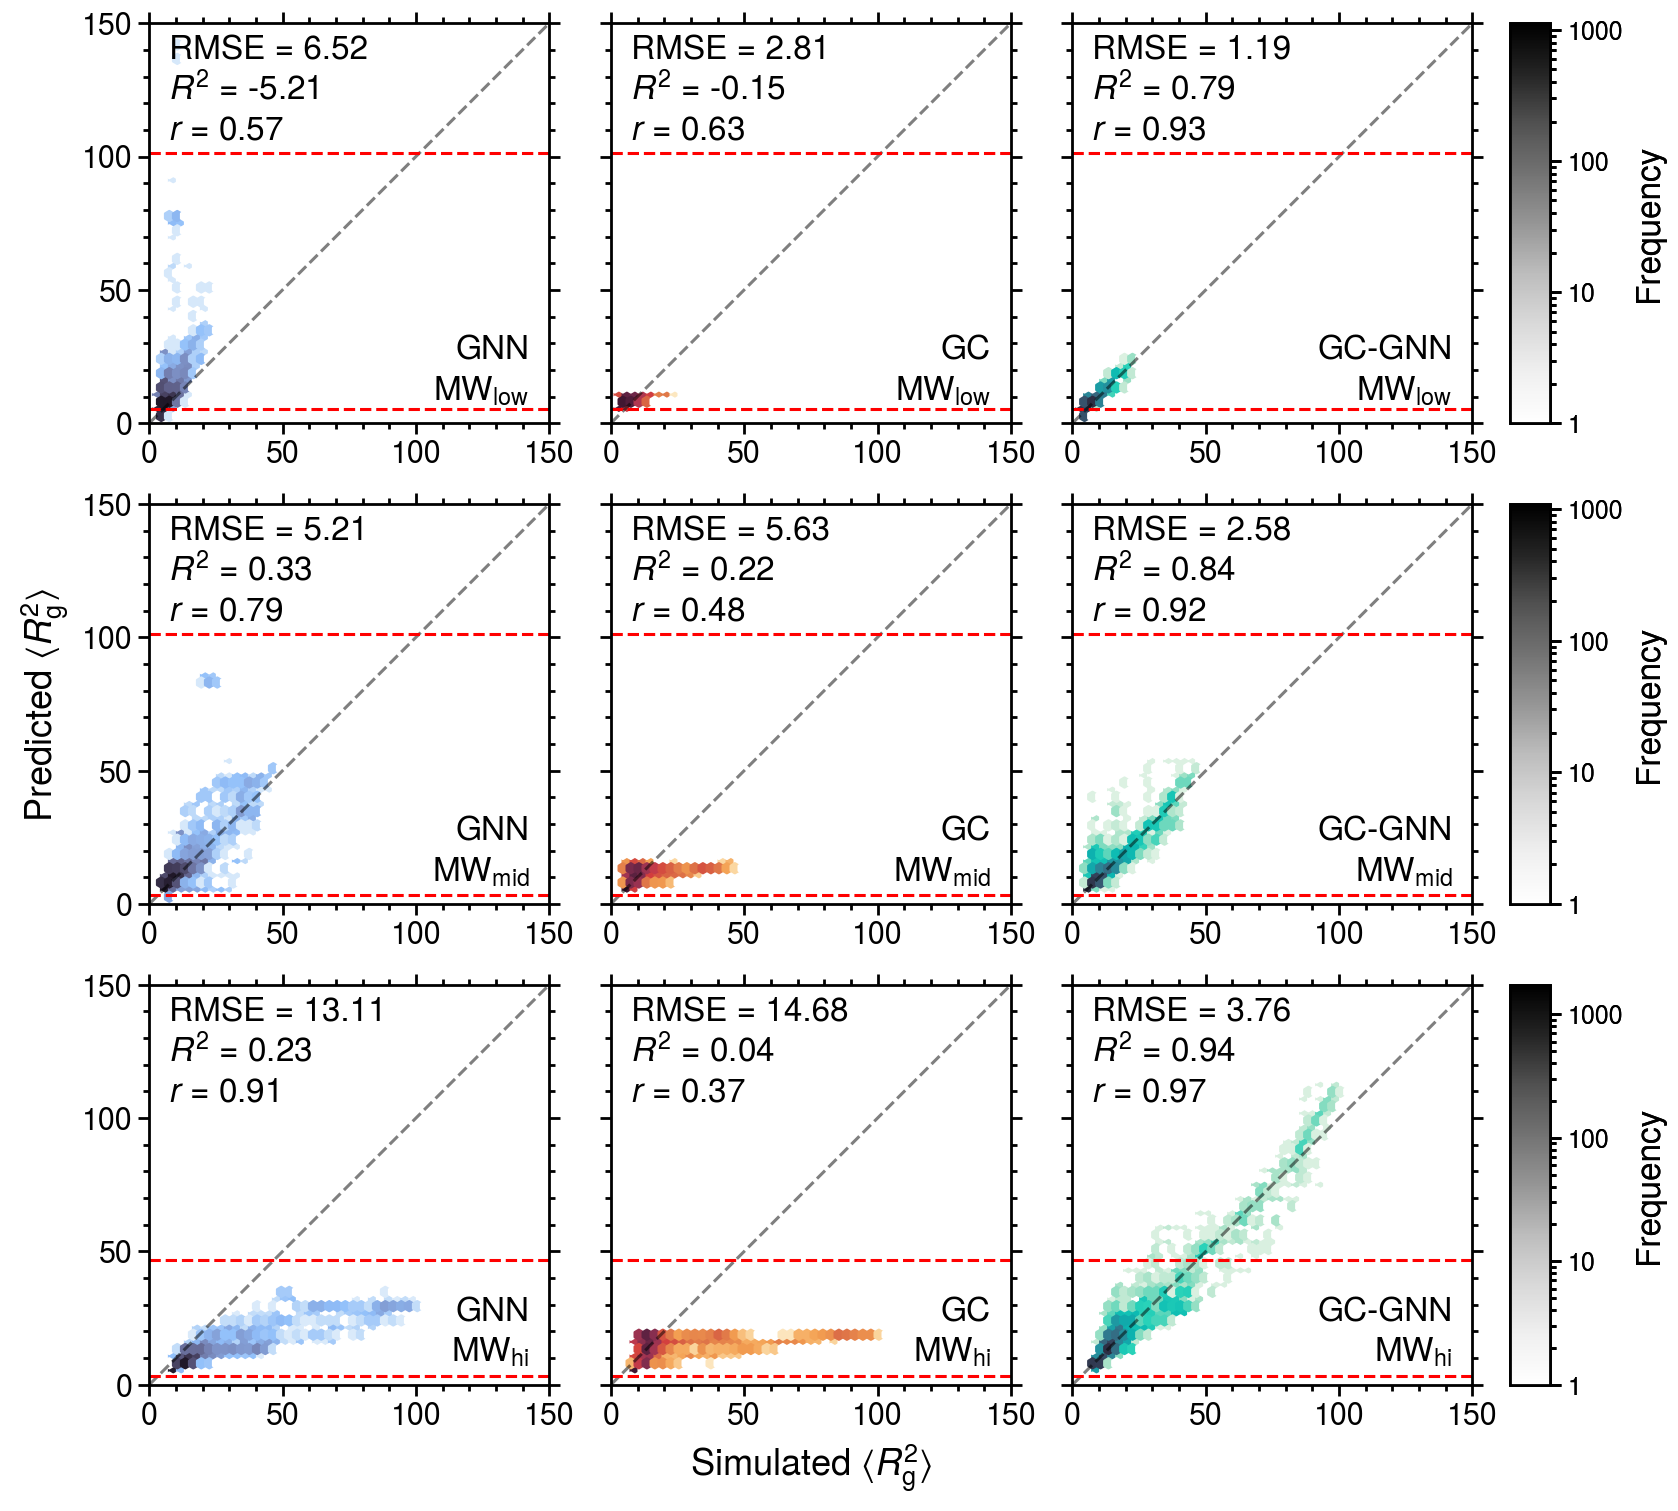

In [61]:
%%time

plot_large_parity(
    rg_mean,
    COLORS,
    PLOT_DIR,
    TRAIN_RESULT_DIR,
    pattern=0,
    y_type="mean",
    scoring="RMSE",
    plot_type="linear",
    rerun=False,
)

### Transferability across molecular weights (std rg2)

CPU times: user 3.49 s, sys: 13.4 ms, total: 3.5 s
Wall time: 3.56 s


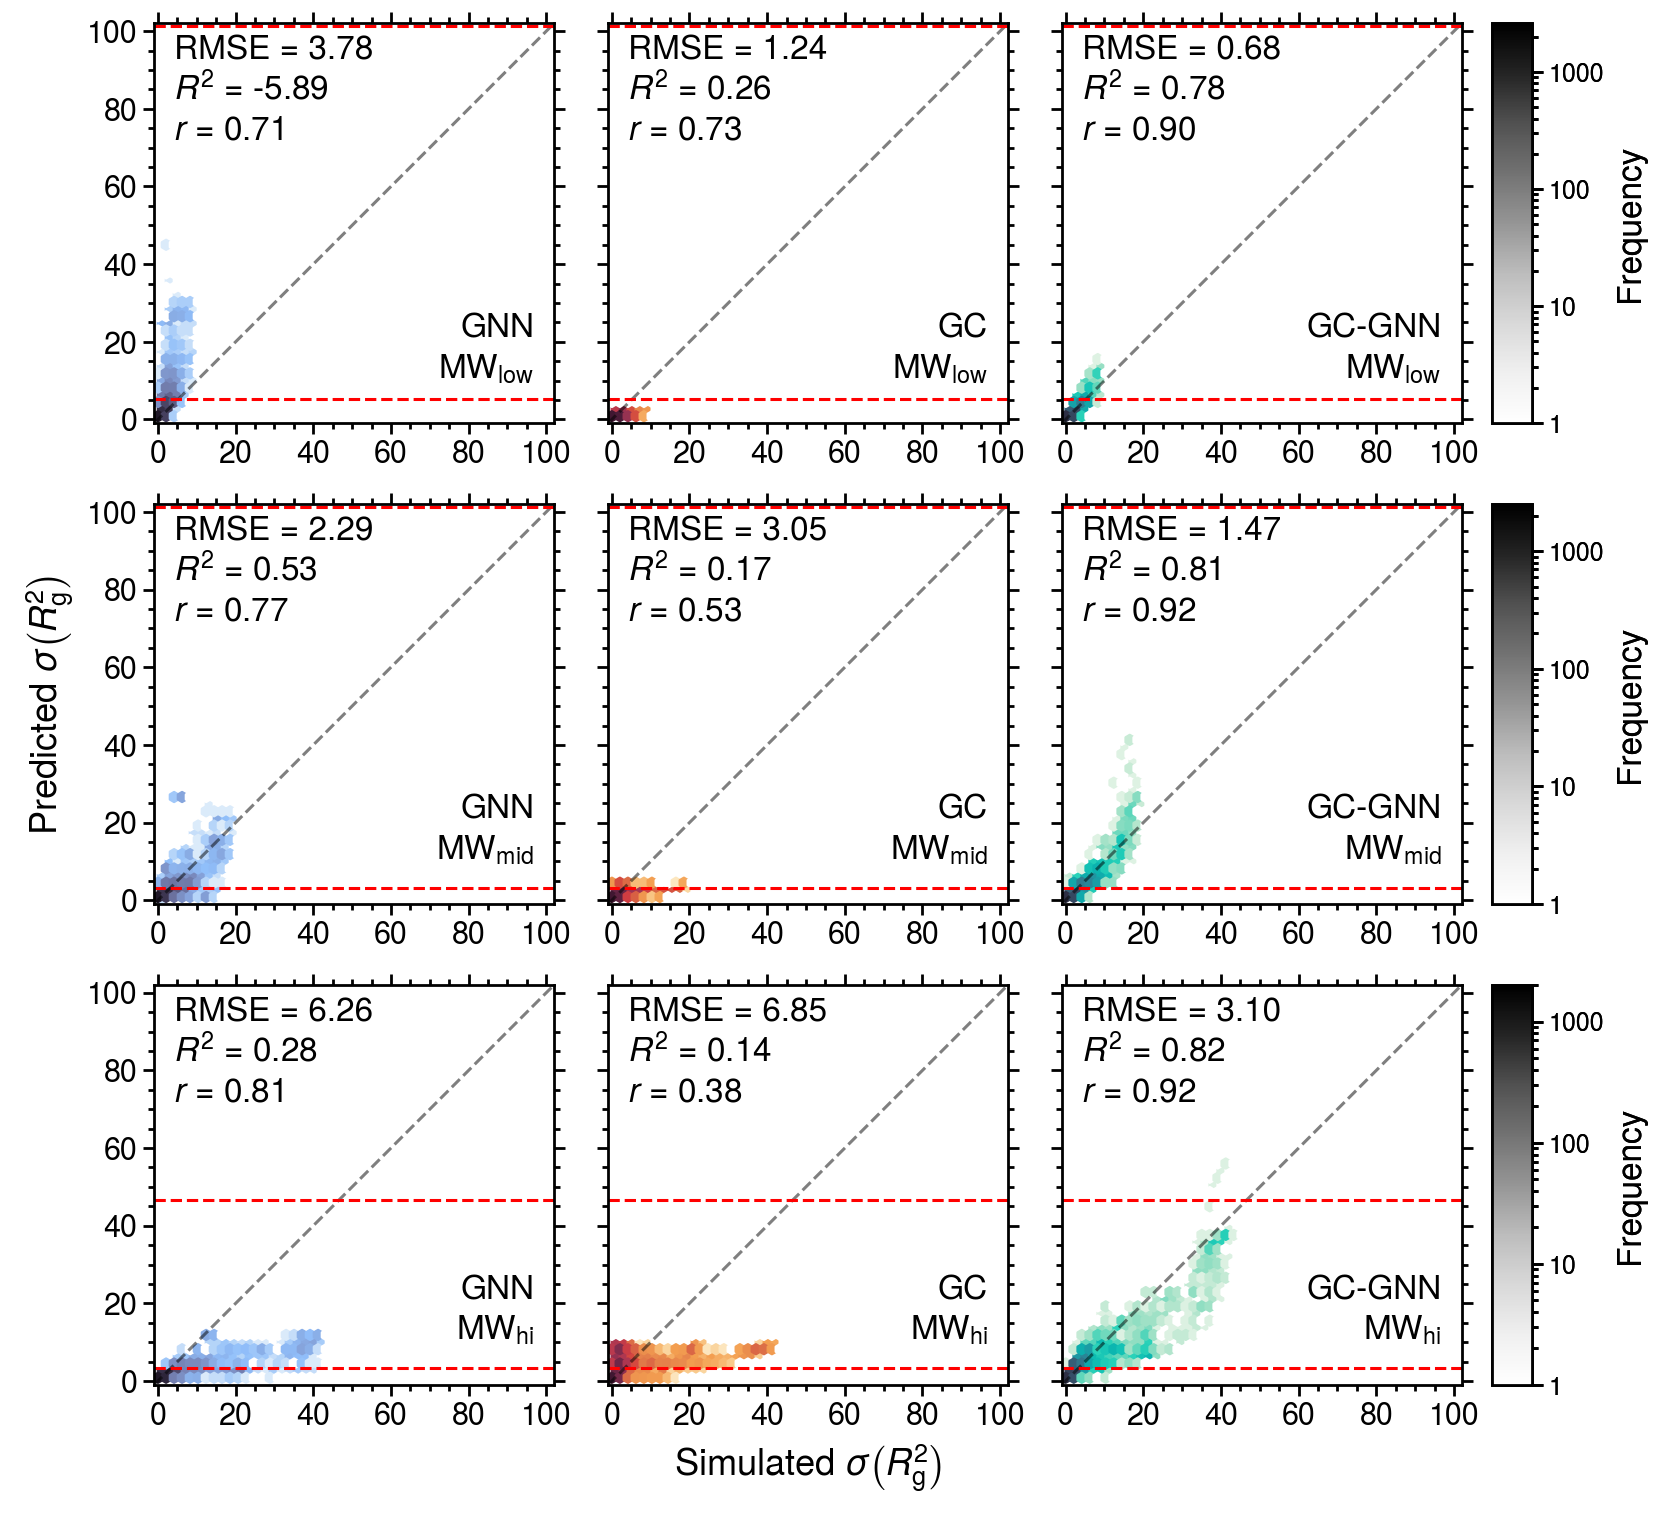

In [21]:
%%time

plot_large_parity(
    rg_mean,
    COLORS,
    PLOT_DIR,
    TRAIN_RESULT_DIR,
    pattern=0,
    y_type="std",
    scoring="RMSE",
    plot_type="linear",
    rerun=False,
)

### Transferability across chemical patterns (mean rg2)

In [23]:
from gcgnn.plot import plot_large_parity_4row

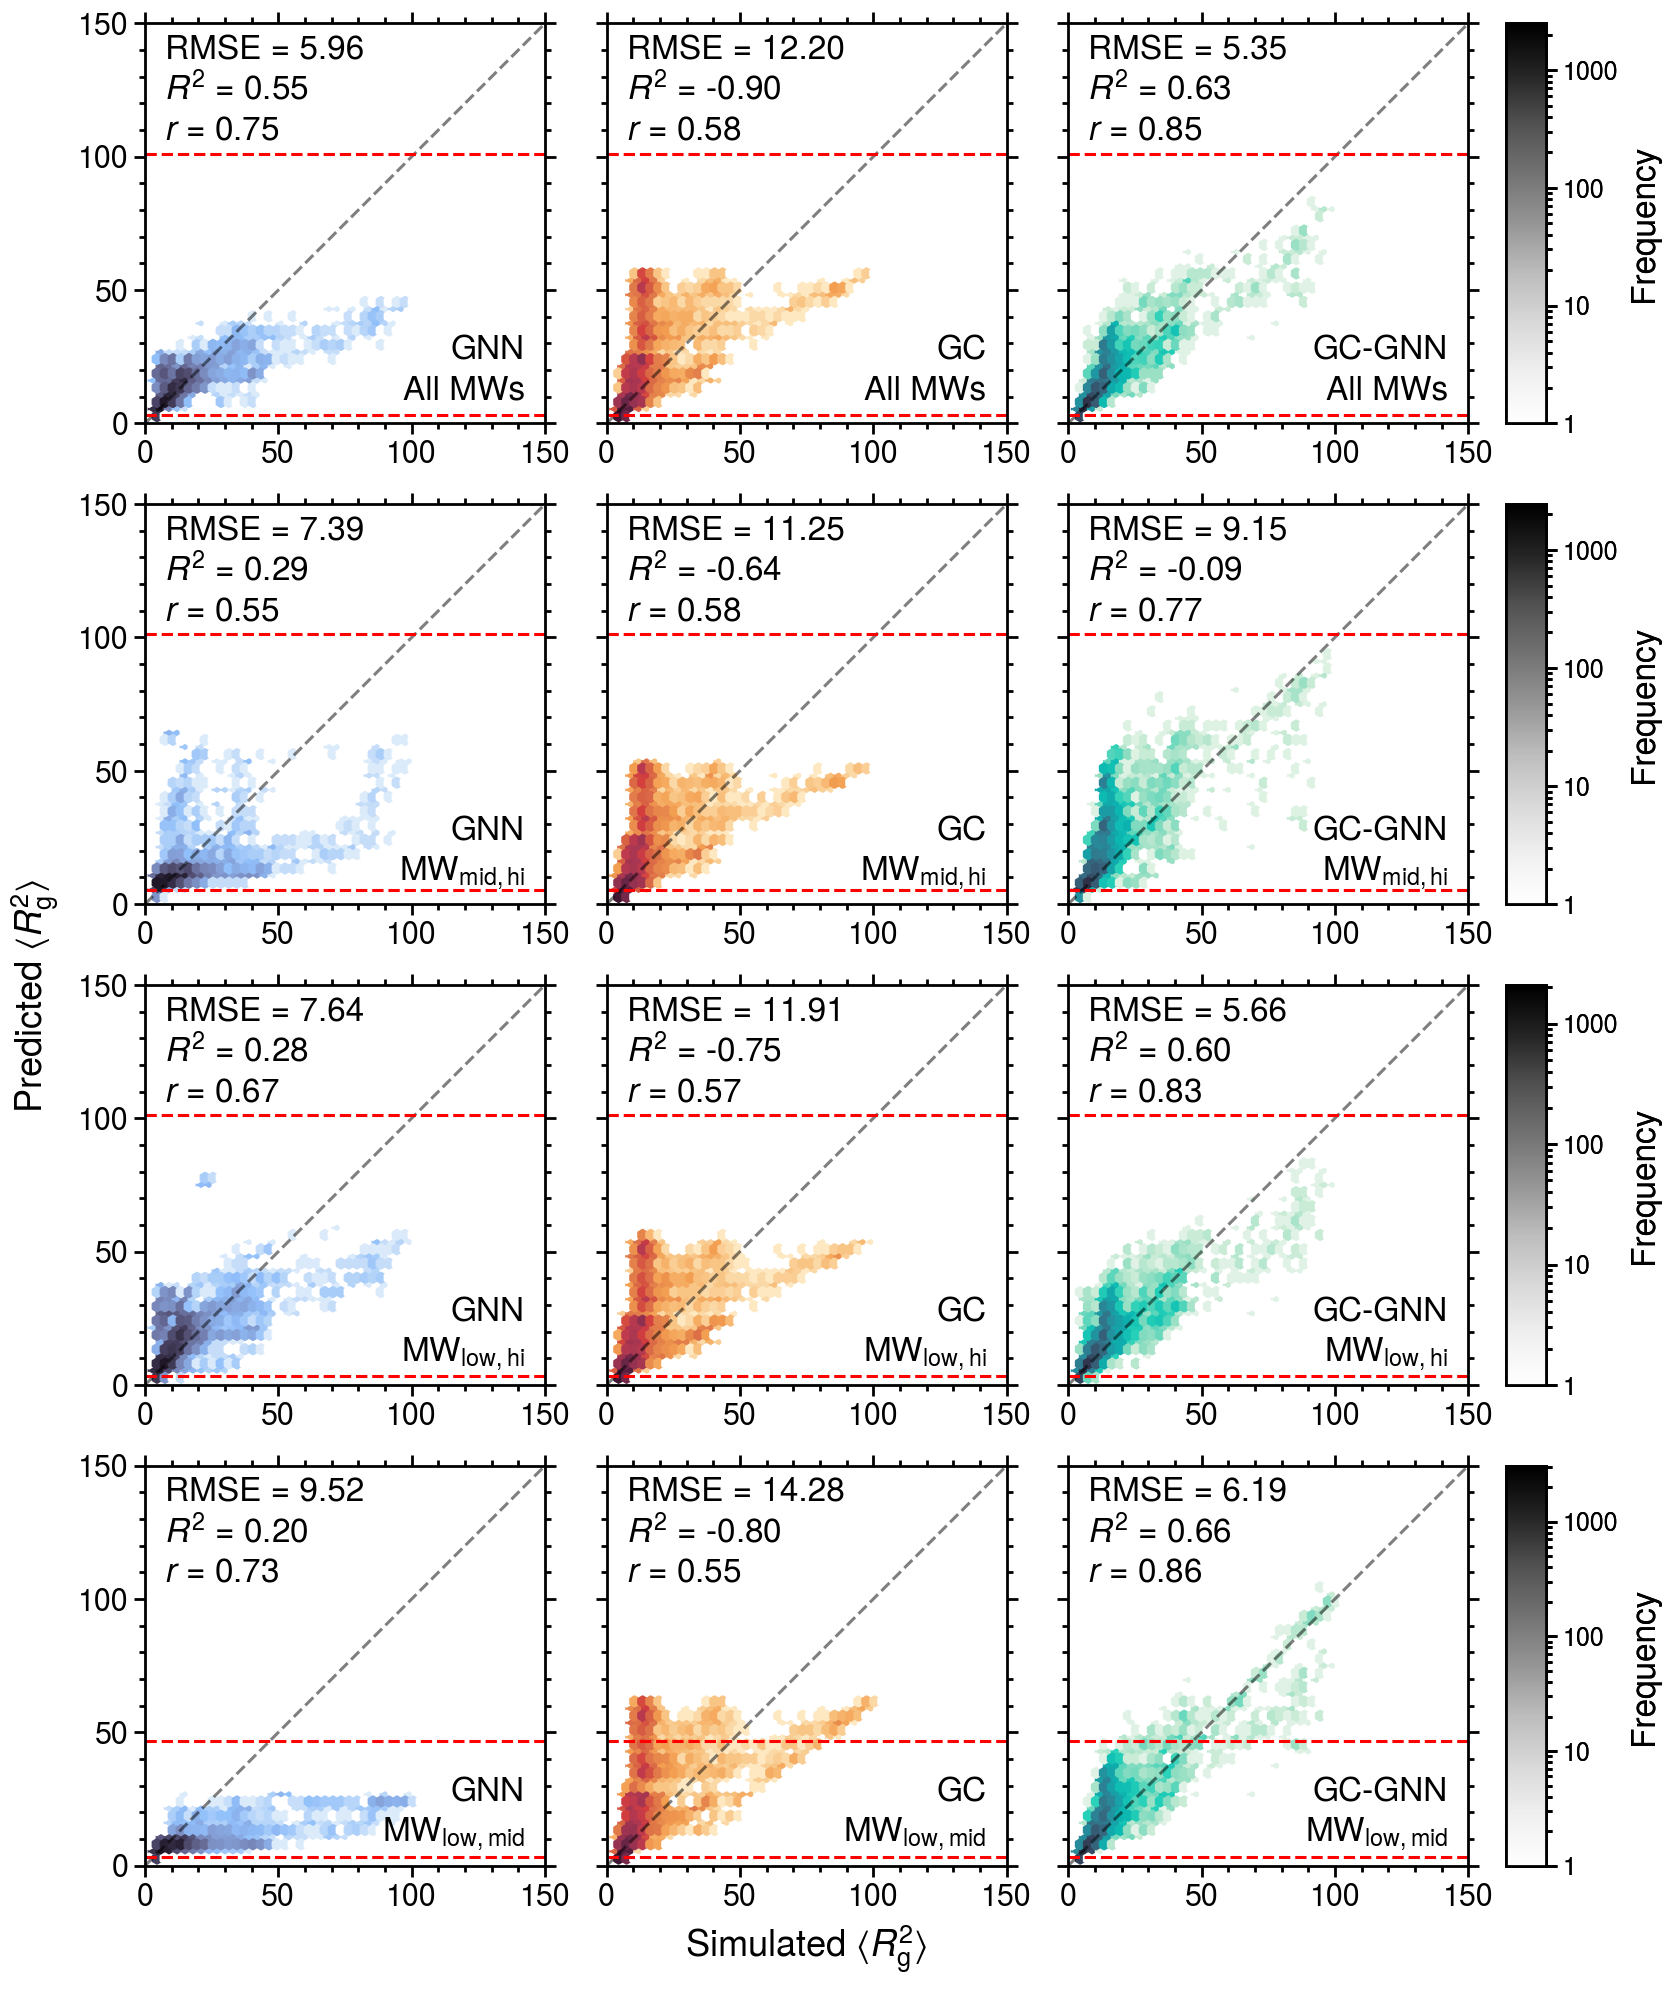

In [25]:
plot_large_parity_4row(
    rg_mean,
    COLORS,
    PLOT_DIR,
    TRAIN_RESULT_DIR,
    pattern=2,
    y_type="mean",
    scoring="RMSE",
    plot_type="linear",
    rerun=False,
)

### Transferability across chemical patterns (std rg2)

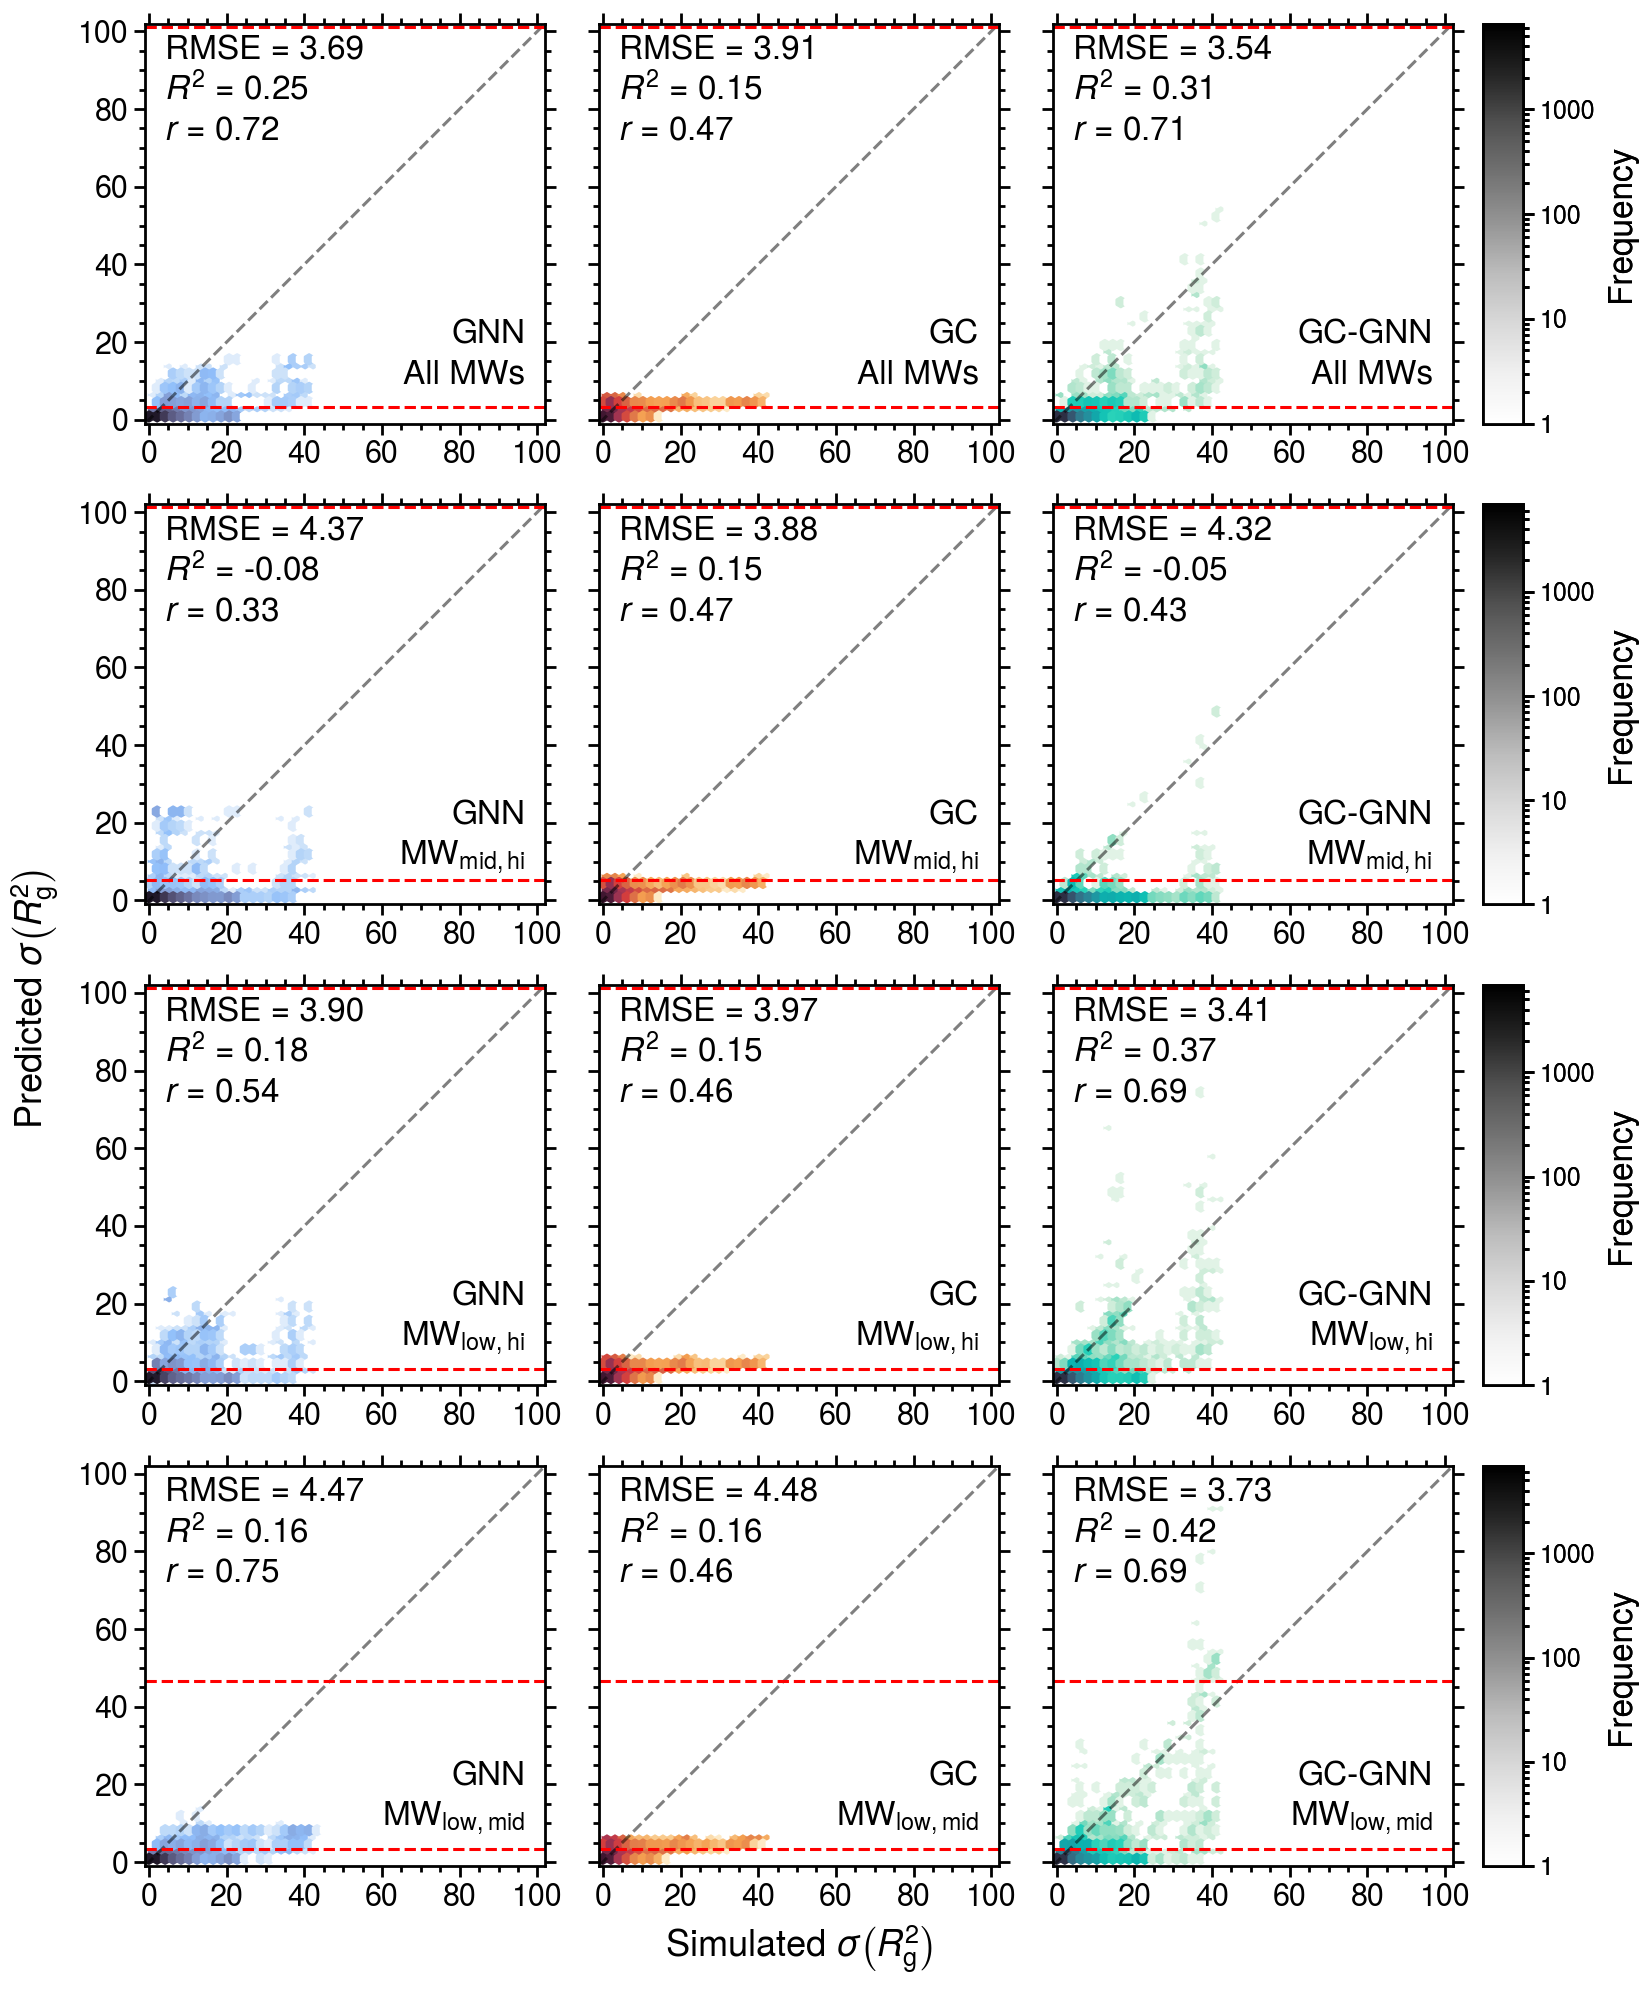

In [27]:
plot_large_parity_4row(
    rg_mean,
    COLORS,
    PLOT_DIR,
    TRAIN_RESULT_DIR,
    pattern=2,
    y_type="std",
    scoring="RMSE",
    plot_type="linear",
    rerun=False,
)

### Performance across architectures

In [3]:
%%time
data_ranges = [(40, 60), (90, 110), (190, 210)]


graph_data = {}
label_data = {}
desc_data  = {}
meta_data  = {}
mode_data  = {}
rg2_mean   = {}
rg2_var    = {}

for start, end in data_ranges:
    filename = os.path.join(DATA_DIR, f"pattern_graph_data_{start}_{end}_rg_new.pickle")
    
    with open(filename, "rb") as handle:
        graph_data[start] = pickle.load(handle)
        label_data[start] = pickle.load(handle)
        desc_data[start]  = pickle.load(handle)
        meta_data[start]  = pickle.load(handle)
        mode_data[start]  = pickle.load(handle)
        rg2_mean[start]   = pickle.load(handle)
        rg2_var[start]    = pickle.load(handle)

    label_data[start] = np.array(label_data[start])
    label_data[start][label_data[start] == 'stara'] = 'star'
    label_data[start][label_data[start] == 'bottlebrush'] = 'comb'

CPU times: user 3.15 s, sys: 459 ms, total: 3.61 s
Wall time: 3.71 s


In [31]:
from gcgnn.plot import plot_dendrimer

### mean

['RMSE', 'MAE', 'R2', 'R', 'MAPE']
[0.9539 0.9787 0.9929 0.7943 0.9764 0.964 ]
Slope: 0.8797


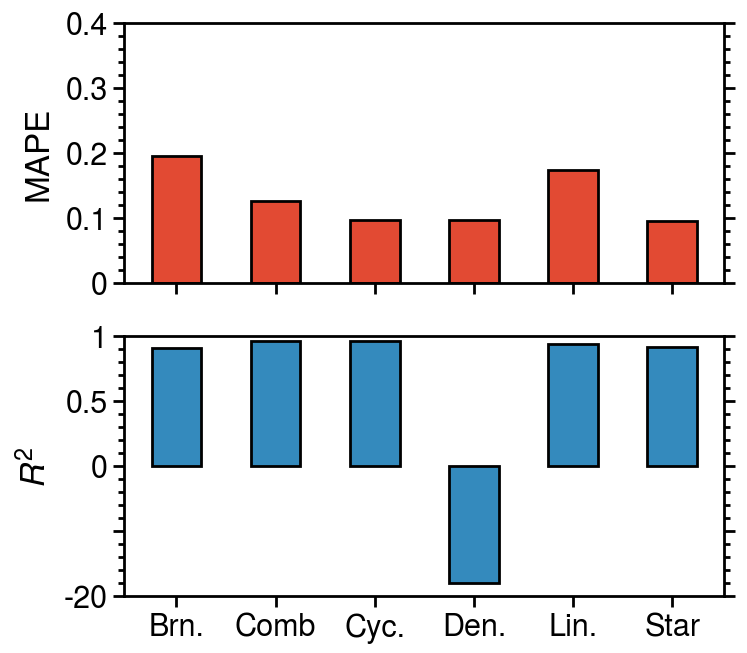

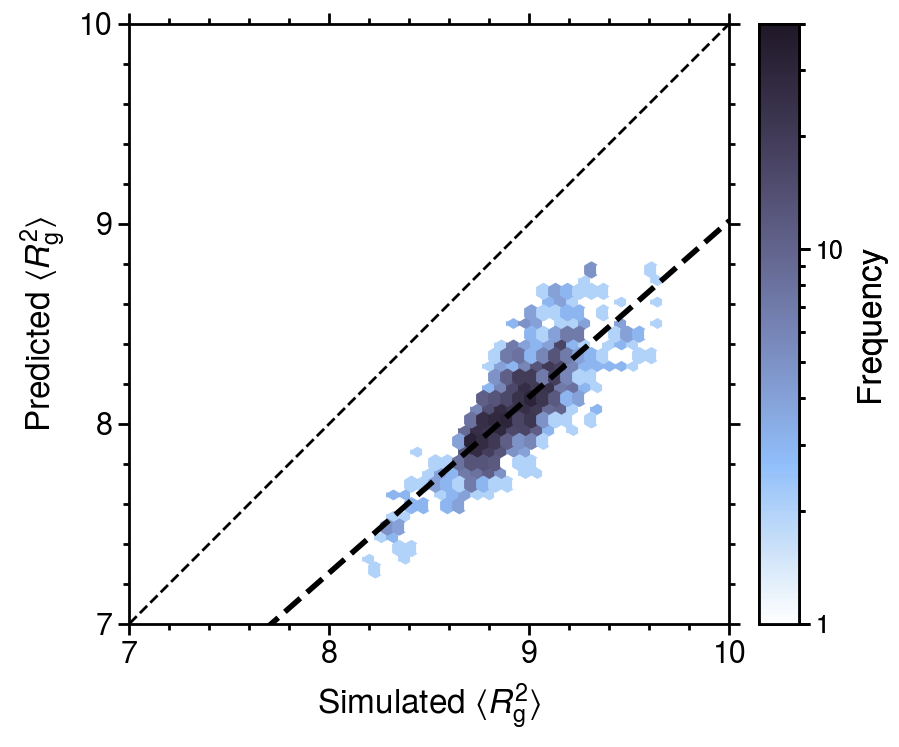

In [32]:
# std test set MW_hi
input_file = "GNN_Guided_Baseline_Simple_0_0_64_0.0005_1000_128_mean_mse_1.pickle"
plot_dendrimer(
    TRAIN_RESULT_DIR, 
    PLOT_DIR, 
    COLORS, 
    label_data, 
    input_file,
    cbar_vmax=40.0,
    bar_ratio=20.0,
    ylim1=[0, 0.4],
    ylim2=[-1, 1],
    first_ticks=[-1, -0.5, 0, 0.5, 1],
    yticklabels=[-20, None, 0, 0.5, 1],
    vmin=7,
    vmax=10,
    second_ticks=[7, 8, 9, 10],
)

['RMSE', 'MAE', 'R2', 'R', 'MAPE']
[0.9251 0.9658 0.9251 0.7671 0.9601 0.7912]
Slope: 0.9127


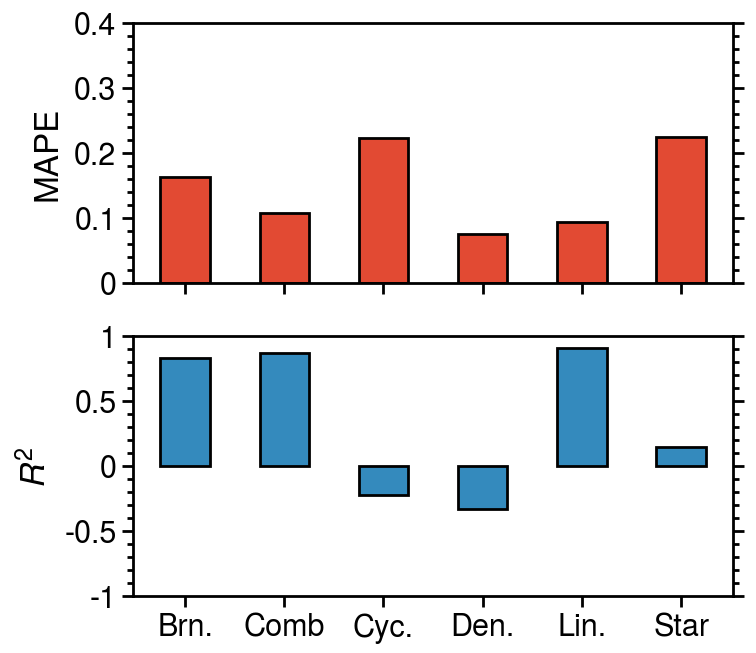

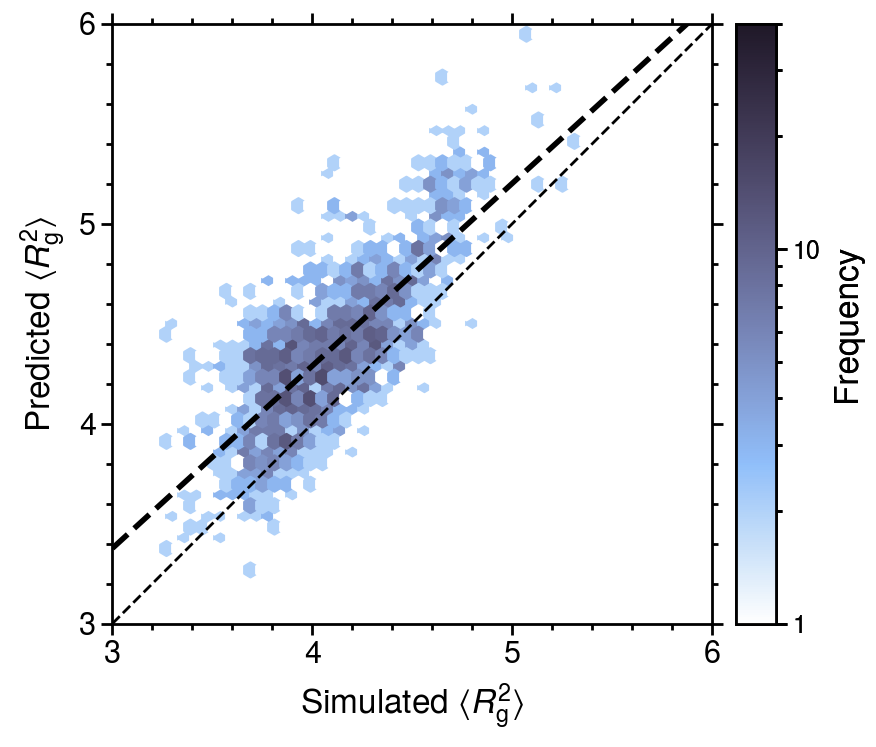

In [54]:
# std test set MW_low
input_file = "GNN_Guided_Baseline_Simple_1_0_256_0.005_1000_32_mean_mse_1.pickle"
plot_dendrimer(
    TRAIN_RESULT_DIR, 
    PLOT_DIR, 
    COLORS, 
    label_data, 
    input_file,
    cbar_vmax=40.0,
    bar_ratio=1.0,
    ylim1=[0, 0.4],
    ylim2=[-1, 1],
    first_ticks=[-1, -0.5, 0, 0.5, 1],
    yticklabels=[-1, -0.5, 0, 0.5, 1],
    vmin=3,
    vmax=6,
    second_ticks=[3, 4, 5, 6],
)

['RMSE', 'MAE', 'R2', 'R', 'MAPE']
[0.8467 0.9827 0.9893 0.9379 0.9727 0.9455]
Slope: 1.0807


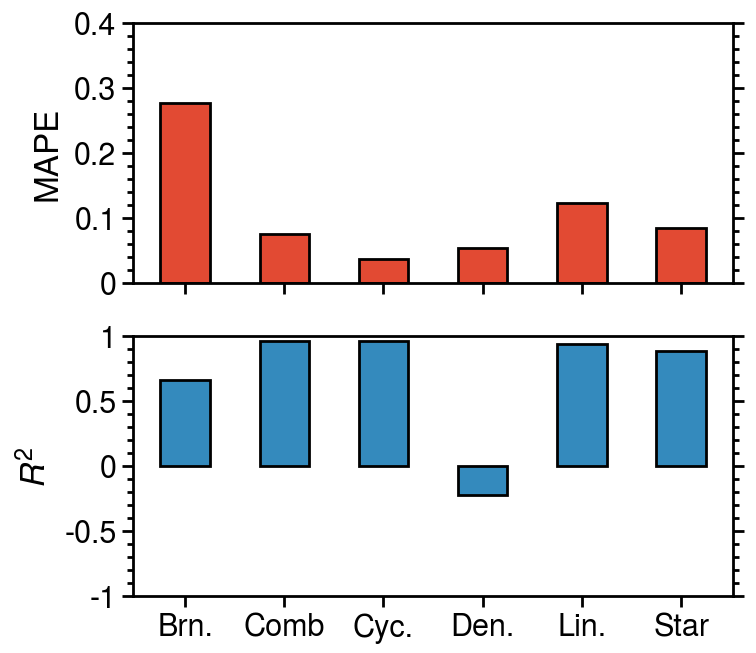

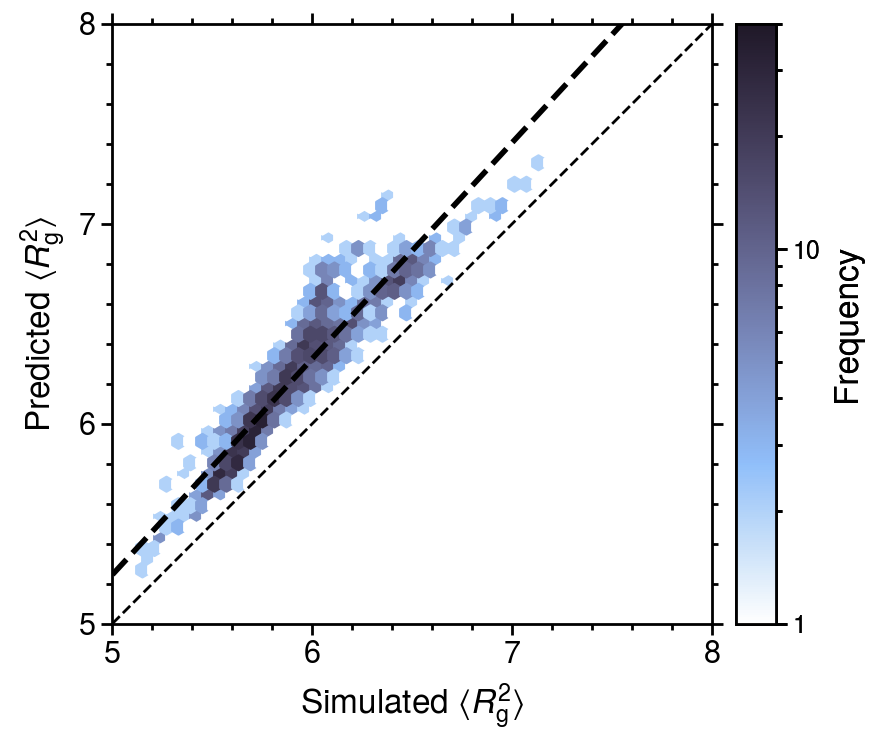

In [35]:
# std test set MW_mid
input_file = "GNN_Guided_Baseline_Simple_2_0_128_0.001_1000_128_mean_mse_1.pickle"
plot_dendrimer(
    TRAIN_RESULT_DIR, 
    PLOT_DIR, 
    COLORS, 
    label_data, 
    input_file,
    cbar_vmax=40.0,
    bar_ratio=1.0,
    ylim1=[0, 0.4],
    ylim2=[-1, 1],
    first_ticks=[-1, -0.5, 0, 0.5, 1],
    yticklabels=[-1, -0.5, 0, 0.5, 1],
    vmin=5,
    vmax=8,
    second_ticks=[5, 6, 7, 8],
)

### std

['RMSE', 'MAE', 'R2', 'R', 'MAPE']
[ 0.8926  0.9392  0.9467 -0.0205  0.9151  0.9076]
Slope: -0.0149


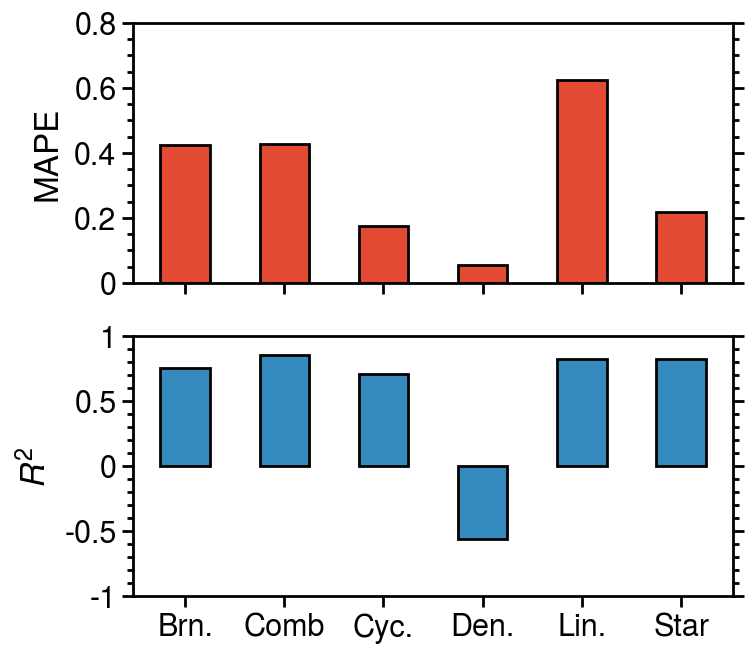

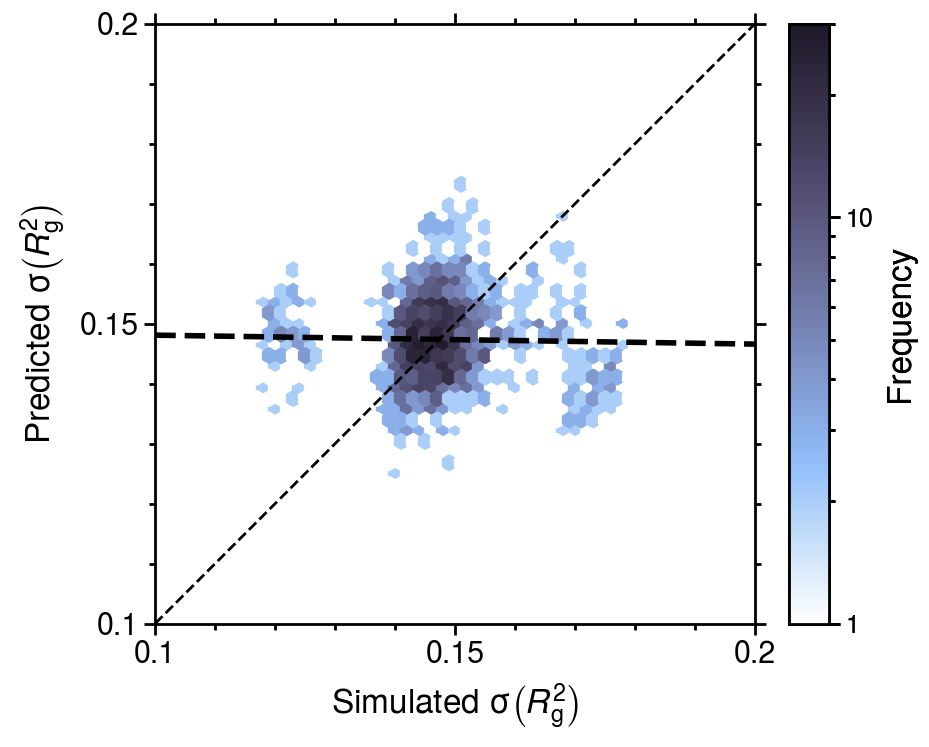

In [19]:
# std test set MW_hi
input_file = "GNN_Guided_Baseline_Simple_0_0_256_0.001_1000_64_std_mse_1.pickle"
plot_dendrimer(
    TRAIN_RESULT_DIR, 
    PLOT_DIR, 
    COLORS, 
    label_data, 
    input_file,
    cbar_vmax=30,
    bar_ratio=1.0,
    ylim1=[0, 0.8],
    ylim2=[-1, 1],
    first_ticks=[-1, -0.5, 0, 0.5, 1],
    yticklabels=[-1, -0.5, 0, 0.5, 1],
    vmin=0.1,
    vmax=0.2,
    second_ticks=[0.1, 0.15, 0.2],
)

['RMSE', 'MAE', 'R2', 'R', 'MAPE']
[0.8817 0.9198 0.7602 0.7172 0.8623 0.9012]
Slope: 1.2328


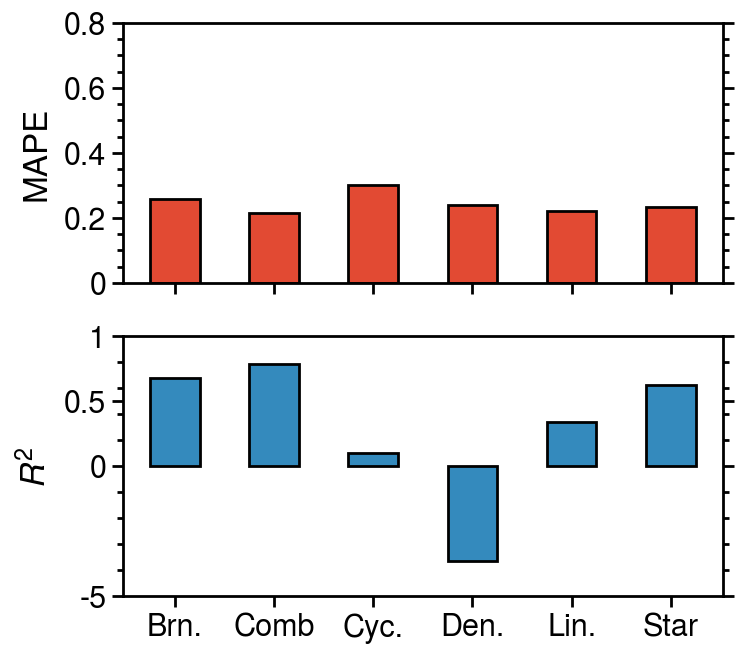

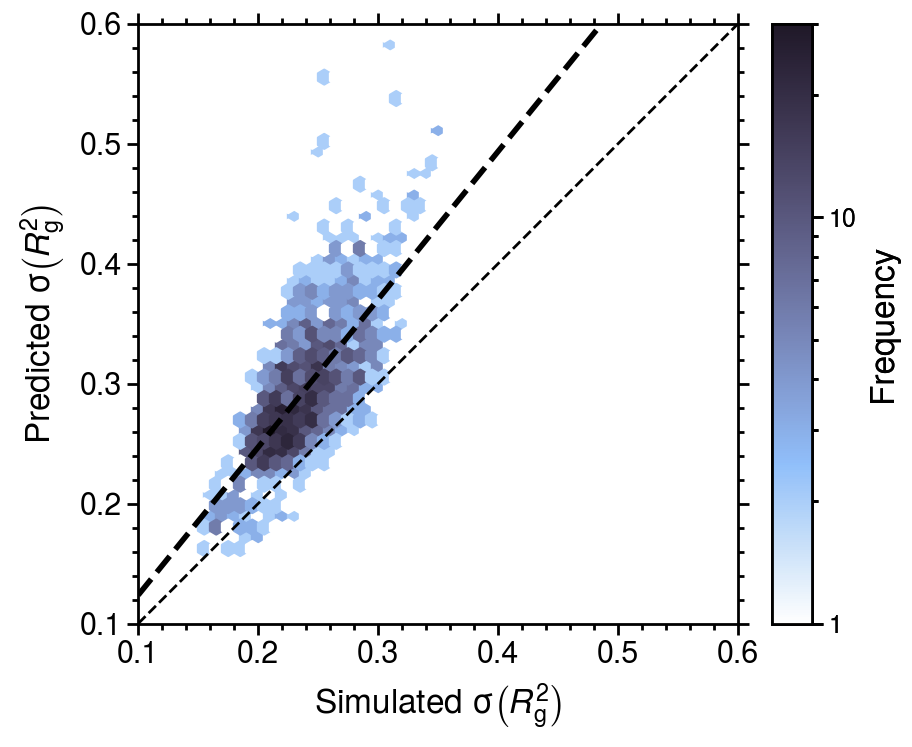

In [21]:
# std test set MW_low
input_file = "GNN_Guided_Baseline_Simple_1_0_64_0.005_1000_64_std_mse_1.pickle"

plot_dendrimer(
    TRAIN_RESULT_DIR, 
    PLOT_DIR, 
    COLORS, 
    label_data, 
    input_file,
    cbar_vmax=30,
    bar_ratio=5.0,
    ylim1=[0, 0.8],
    ylim2=[-1, 1],
    first_ticks=[-1, 0, 0.5, 1],
    yticklabels=[-5, 0, 0.5, 1],
    vmin=0.1,
    vmax=0.6,
    second_ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
)

['RMSE', 'MAE', 'R2', 'R', 'MAPE']
[0.8754 0.9622 0.9623 0.8024 0.9075 0.8978]
Slope: 0.4439


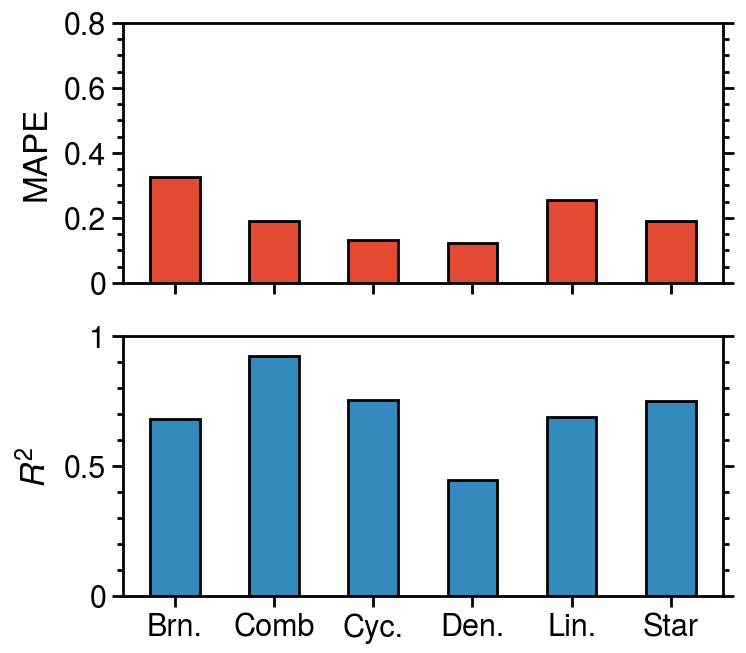

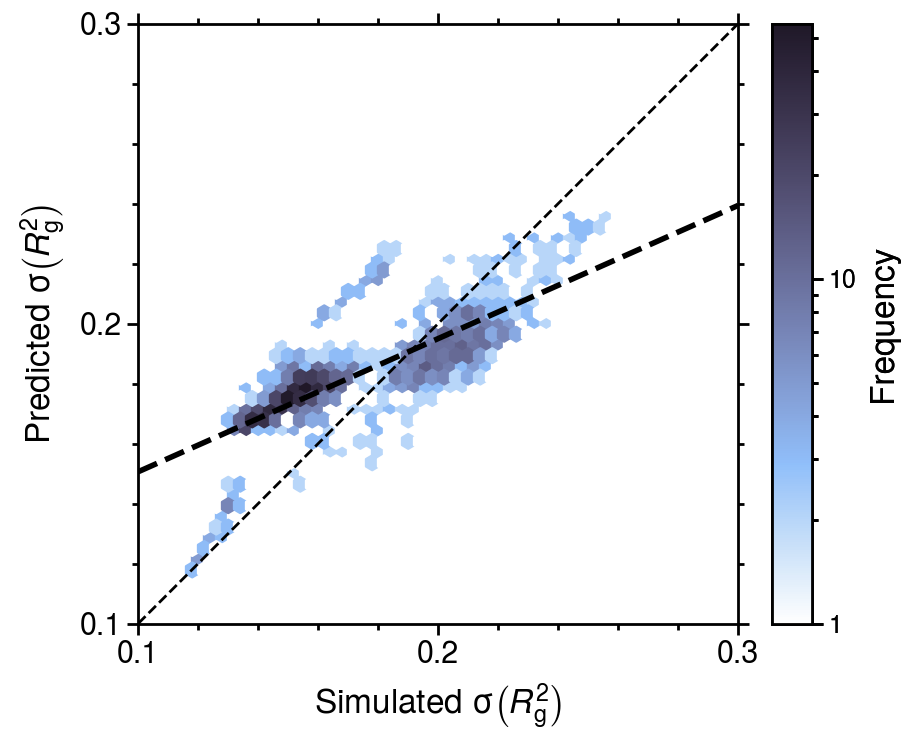

In [55]:
# std test set MW_mid
input_file = "GNN_Guided_Baseline_Simple_2_0_64_0.001_1000_64_std_mse_1.pickle"

plot_dendrimer(
    TRAIN_RESULT_DIR, 
    PLOT_DIR, 
    COLORS, 
    label_data, 
    input_file,
    cbar_vmax=None,
    bar_ratio=1.0,
    ylim1=[0, 0.8],
    ylim2=[0, 1],
    first_ticks=[0, 0.5, 1],
    yticklabels=[0, 0.5, 1],
    vmin=0.1,
    vmax=0.3,
    second_ticks=[0.1, 0.2, 0.3],
)